<a href="https://colab.research.google.com/github/Adelaaas/Process_mining_lab_hes/blob/main/ChuginM22_SH02_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!pip install pm4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer

In [33]:
# Считывание файла в формате .csv

# 1. Считываем сначала наши данные с помощью библиотеки Pandas в DataFrame
log_csv = pd.read_csv('https://raw.githubusercontent.com/Adelaaas/Process_mining_lab_hes/main/ArtificialPatientTreatment.csv')

log_csv

,patient,action,org:resource,DateTime
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11
1,patient 0,Blood test,Lab,2017-01-02 12:47:33
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09
...,...,...,...,...
685,patient 99,X-ray scan,Team 2,2017-05-25 11:03:27
686,patient 99,Physical test,Nurse Corey,2017-05-25 11:55:24
687,patient 99,Second consult,Dr. Anna,2017-05-29 15:12:39
688,patient 99,Medicine,Pharmacy,2017-05-29 16:17:13


In [34]:
# Преобразуем тип данных в колонке DateTime в специальных формат даты и времени библиотеки Pandas
log_csv[' DateTime'] = pd.to_datetime(log_csv[' DateTime'])

In [35]:
# Создаем сгруппированную таблицу с начальной отметкой времени и конечной для каждого case
case_starts_ends = log_csv.pivot_table(index='patient', aggfunc={' DateTime': ['min', 'max']}) 

case_starts_ends

DateTime                    
                           max                 min
patient                                           
patient 0  2017-01-09 08:29:28 2017-01-02 11:40:11
patient 1  2017-01-06 16:49:21 2017-01-02 12:50:35
patient 10 2017-01-30 11:19:19 2017-01-17 14:13:17
patient 11 2017-02-02 10:13:13 2017-01-19 13:35:20
patient 12 2017-01-27 11:18:57 2017-01-20 11:43:38
...                        ...                 ...
patient 95 2017-05-26 10:19:34 2017-05-15 09:15:08
patient 96 2017-05-24 16:38:21 2017-05-15 10:31:45
patient 97 2017-05-22 14:37:56 2017-05-17 08:44:01
patient 98 2017-05-31 14:16:13 2017-05-17 10:56:48
patient 99 2017-05-31 12:46:43 2017-05-18 11:57:11

[100 rows x 2 columns]

In [36]:
case_starts_ends = case_starts_ends.reset_index()
case_starts_ends.columns = ['patient', 'caseend', 'casestart'] 
# Merge with the main event log data so that for each row we have the start and end times.
log_csv = log_csv.merge(case_starts_ends, on='patient') 
# Calculate the relative time by subtracting the process start time from the event timestamp
log_csv['relativetime'] = log_csv[' DateTime'] - log_csv['casestart']
# Convert relative times to more friendly measures
## seconds
log_csv['relativetime_s'] = log_csv['relativetime'].dt.seconds + 86400*log_csv['relativetime'].dt.days 
## days
log_csv['relativedays'] = log_csv['relativetime'].dt.days

log_csv

,patient,action,org:resource,DateTime,caseend,casestart,relativetime,relativetime_s,relativedays
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 00:00:00,0,0
1,patient 0,Blood test,Lab,2017-01-02 12:47:33,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:07:22,4042,0
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:13:39,4419,0
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 04:40:55,16855,0
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09,2017-01-09 08:29:28,2017-01-02 11:40:11,3 days 01:42:58,265378,3
...,...,...,...,...,...,...,...,...,...
685,patient 99,X-ray scan,Team 2,2017-05-25 11:03:27,2017-05-31 12:46:43,2017-05-18 11:57:11,6 days 23:06:16,601576,6
686,patient 99,Physical test,Nurse Corey,2017-05-25 11:55:24,2017-05-31 12:46:43,2017-05-18 11:57:11,6 days 23:58:13,604693,6
687,patient 99,Second consult,Dr. Anna,2017-05-29 15:12:39,2017-05-31 12:46:43,2017-05-18 11:57:11,11 days 03:15:28,962128,11
688,patient 99,Medicine,Pharmacy,2017-05-29 16:17:13,2017-05-31 12:46:43,2017-05-18 11:57:11,11 days 04:20:02,966002,11


In [37]:
log_csv['caselength'] = log_csv['caseend'] - log_csv['casestart']

log_csv

,patient,action,org:resource,DateTime,caseend,casestart,relativetime,relativetime_s,relativedays,caselength
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 00:00:00,0,0,6 days 20:49:17
1,patient 0,Blood test,Lab,2017-01-02 12:47:33,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:07:22,4042,0,6 days 20:49:17
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:13:39,4419,0,6 days 20:49:17
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 04:40:55,16855,0,6 days 20:49:17
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09,2017-01-09 08:29:28,2017-01-02 11:40:11,3 days 01:42:58,265378,3,6 days 20:49:17
...,...,...,...,...,...,...,...,...,...,...
685,patient 99,X-ray scan,Team 2,2017-05-25 11:03:27,2017-05-31 12:46:43,2017-05-18 11:57:11,6 days 23:06:16,601576,6,13 days 00:49:32
686,patient 99,Physical test,Nurse Corey,2017-05-25 11:55:24,2017-05-31 12:46:43,2017-05-18 11:57:11,6 days 23:58:13,604693,6,13 days 00:49:32
687,patient 99,Second consult,Dr. Anna,2017-05-29 15:12:39,2017-05-31 12:46:43,2017-05-18 11:57:11,11 days 03:15:28,962128,11,13 days 00:49:32
688,patient 99,Medicine,Pharmacy,2017-05-29 16:17:13,2017-05-31 12:46:43,2017-05-18 11:57:11,11 days 04:20:02,966002,11,13 days 00:49:32


In [38]:
patient_events = pd.crosstab(log_csv['patient'], log_csv[' action']) 
patient_events

action,Blood test,Final consult,First consult,Medicine,Physical test,Second consult,Surgery,X-ray scan
patient,,,,,,,,
patient 0,1,1,1,0,1,1,1,0
patient 1,1,1,1,1,1,1,0,1
patient 10,1,1,1,1,1,1,0,1
patient 11,1,1,1,0,1,1,1,1
patient 12,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...
patient 95,1,1,1,0,1,1,1,0
patient 96,1,1,1,1,1,1,0,1
patient 97,1,1,1,1,1,1,0,1


In [39]:
# 2. Переименуем колонки в соответсвии с требованиями Process mining
log_csv.rename(columns=
                {' DateTime': 'time:timestamp',
                 'patient': 'case:concept:name',
                 ' action': 'concept:name',
                 ' org:resource': 'org:resource'},
                inplace=True)

log_csv

,case:concept:name,concept:name,org:resource,time:timestamp,caseend,casestart,relativetime,relativetime_s,relativedays,caselength
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 00:00:00,0,0,6 days 20:49:17
1,patient 0,Blood test,Lab,2017-01-02 12:47:33,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:07:22,4042,0,6 days 20:49:17
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:13:39,4419,0,6 days 20:49:17
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 04:40:55,16855,0,6 days 20:49:17
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09,2017-01-09 08:29:28,2017-01-02 11:40:11,3 days 01:42:58,265378,3,6 days 20:49:17
...,...,...,...,...,...,...,...,...,...,...
685,patient 99,X-ray scan,Team 2,2017-05-25 11:03:27,2017-05-31 12:46:43,2017-05-18 11:57:11,6 days 23:06:16,601576,6,13 days 00:49:32
686,patient 99,Physical test,Nurse Corey,2017-05-25 11:55:24,2017-05-31 12:46:43,2017-05-18 11:57:11,6 days 23:58:13,604693,6,13 days 00:49:32
687,patient 99,Second consult,Dr. Anna,2017-05-29 15:12:39,2017-05-31 12:46:43,2017-05-18 11:57:11,11 days 03:15:28,962128,11,13 days 00:49:32
688,patient 99,Medicine,Pharmacy,2017-05-29 16:17:13,2017-05-31 12:46:43,2017-05-18 11:57:11,11 days 04:20:02,966002,11,13 days 00:49:32


In [40]:
# 3. Преобразуем DataFrame в формат журнала Process mining
event_log = log_converter.apply(log_csv)

# Видим, что теперь тип наших данных EventLog
type(event_log)

pm4py.objects.log.obj.EventLog

In [41]:
from pm4py.algo.filtering.log.variants import variants_filter
from pm4py.statistics.traces.generic.log import case_statistics

variants = variants_filter.get_variants(event_log)
print(f"У нас есть: {len(variants)} различных вариантов путей в нашем журнале событий")

У нас есть: 15 различных вариантов путей в нашем журнале событий


In [42]:
# можно посмотреть на рэти различные варианты
# 'count' - сколько данные набор событий в такой последовательности встречается в журнале событий
# 'variant' - набор этих действий и их последовательность
# всего 15 словарей - так как 15 вариантов
variants_count = case_statistics.get_variant_statistics(log_csv)

variants_count

[{'variant': (' First consult',
   ' Blood test',
   ' X-ray scan',
   ' Physical test',
   ' Second consult',
   ' Medicine',
   ' Final consult'),
  'count': 18},
 {'variant': (' First consult',
   ' Blood test',
   ' Physical test',
   ' X-ray scan',
   ' Second consult',
   ' Medicine',
   ' Final consult'),
  'count': 14},
 {'variant': (' First consult',
   ' X-ray scan',
   ' Physical test',
   ' Blood test',
   ' Second consult',
   ' Medicine',
   ' Final consult'),
  'count': 12},
 {'variant': (' First consult',
   ' Physical test',
   ' X-ray scan',
   ' Blood test',
   ' Second consult',
   ' Medicine',
   ' Final consult'),
  'count': 11},
 {'variant': (' First consult',
   ' Physical test',
   ' Blood test',
   ' X-ray scan',
   ' Second consult',
   ' Medicine',
   ' Final consult'),
  'count': 10},
 {'variant': (' First consult',
   ' X-ray scan',
   ' Blood test',
   ' Physical test',
   ' Second consult',
   ' Medicine',
   ' Final consult'),
  'count': 9},
 {'variant'

## Задания. Изучение журнала событий

1. Каково минимальное и максимальное количество событий в одном случае?
2. Какие события являются общими для всех процессов?
3. Найдите наибоее часто встречающуюся последовательность событий.
4. Какой пациент на лечение тратил меньше всего времени, а какой больше?
6. Создать в DataFrame новую колонку, в которой будет записано количество событий для данного процесса (NumActions in Case)
7. Pation 13 с каким врачом/врачами он/она консультировался?
8. Какое событие является наиболее ресурсоёмким в данном журнале событий?
9. Есть ли врачи или медсестры, которые перегружены работой?
10. Какие мероприятия (actions) непропорционально отнимают время у некоторых врачей и медсестер? Каково распределение событий среди врачей и медсестер?
11. Какие события связаны с узкими местами и какие ресурсы задействованы?
12. Постройте график/и распределения времени между первой консультацией и следующим действием пациента. Каково среднее время между первой консультацией и следующим шагом лечения? Каково максимальное и минимальное время?
13. Используя библиотеки PM4PY и networkx, создайте граф социальных связей по данному журналу событий, используя метрику SNA.
Документация: https://pm4py.fit.fraunhofer.de/documentation#social-network-analysis

1. Минимальное и максимальное количество событий

In [43]:
from pm4py.algo.filtering.log.attributes import attributes_filter

activities = attributes_filter.get_attribute_values(log_csv, 'concept:name')
activities
print(f'Всего событий в поликлинике: {len(activities)}')

Всего событий в поликлинике: 8


In [44]:
min_actions_count = min(log_csv.groupby('case:concept:name').count()['concept:name'])
max_actions_count = max(log_csv.groupby('case:concept:name').count()['concept:name'])
print(f'Минимальное количество событий для одного пациента - {min_actions_count}, максимальное количество событий - {max_actions_count}')

Минимальное количество событий для одного пациента - 6, максимальное количество событий - 7


2. Какие события являются общим для всех процессов?

In [45]:
event_counts = log_csv.groupby('concept:name')['case:concept:name'].nunique()
common_event = event_counts[event_counts == len(log_csv['case:concept:name'].unique())]
common_event

concept:name
 Blood test        100
 Final consult     100
 First consult     100
 Physical test     100
 Second consult    100
Name: case:concept:name, dtype: int64

3. Найдите наибоее часто встречающуюся последовательность событий.

In [46]:
from pm4py.algo.filtering.log.variants import variants_filter
from pm4py.statistics.traces.generic.log import case_statistics

variants = variants_filter.get_variants(event_log)
variants_count = case_statistics.get_variant_statistics(log_csv)

max_count = max(variants_count, key=lambda x: x['count'])
print(max_count['variant'])

(' First consult', ' Blood test', ' X-ray scan', ' Physical test', ' Second consult', ' Medicine', ' Final consult')


4. Какой пациент на лечение тратил меньше всего времени, а какой больше?

In [47]:
min_time_patient = log_csv.loc[log_csv['caselength'].idxmin(), 'case:concept:name']
min_time = log_csv.loc[log_csv['caselength'].idxmin(), 'caselength']
max_time_patient = log_csv.loc[log_csv['caselength'].idxmax(), 'case:concept:name']
max_time = log_csv.loc[log_csv['caselength'].idxmax(), 'caselength']

print(f'Больше всего времени ({max_time}) потратил {max_time_patient}, меньше всего времени ({min_time}) потратил {min_time_patient}')

Больше всего времени (17 days 02:43:04) потратил patient 47, меньше всего времени (1 days 01:34:04) потратил patient 76


5. Создать в DataFrame новую колонку, в которой будет записано количество событий для данного процесса (NumActions in Case)

In [48]:
log_csv['NumActions in Case'] = log_csv.groupby('case:concept:name')['concept:name'].transform('count')
grouped_events = log_csv.groupby('case:concept:name')['NumActions in Case'].count().reset_index()
print(grouped_events)

log_csv['NumActions in Case'] = log_csv.groupby('case:concept:name').cumcount()+1
log_csv



   case:concept:name  NumActions in Case
0          patient 0                   6
1          patient 1                   7
2         patient 10                   7
3         patient 11                   7
4         patient 12                   7
..               ...                 ...
95        patient 95                   6
96        patient 96                   7
97        patient 97                   7
98        patient 98                   7
99        patient 99                   7

[100 rows x 2 columns]


,case:concept:name,concept:name,org:resource,time:timestamp,caseend,casestart,relativetime,relativetime_s,relativedays,caselength,NumActions in Case
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 00:00:00,0,0,6 days 20:49:17,1
1,patient 0,Blood test,Lab,2017-01-02 12:47:33,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:07:22,4042,0,6 days 20:49:17,2
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:13:39,4419,0,6 days 20:49:17,3
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 04:40:55,16855,0,6 days 20:49:17,4
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09,2017-01-09 08:29:28,2017-01-02 11:40:11,3 days 01:42:58,265378,3,6 days 20:49:17,5
...,...,...,...,...,...,...,...,...,...,...,...
685,patient 99,X-ray scan,Team 2,2017-05-25 11:03:27,2017-05-31 12:46:43,2017-05-18 11:57:11,6 days 23:06:16,601576,6,13 days 00:49:32,3
686,patient 99,Physical test,Nurse Corey,2017-05-25 11:55:24,2017-05-31 12:46:43,2017-05-18 11:57:11,6 days 23:58:13,604693,6,13 days 00:49:32,4
687,patient 99,Second consult,Dr. Anna,2017-05-29 15:12:39,2017-05-31 12:46:43,2017-05-18 11:57:11,11 days 03:15:28,962128,11,13 days 00:49:32,5
688,patient 99,Medicine,Pharmacy,2017-05-29 16:17:13,2017-05-31 12:46:43,2017-05-18 11:57:11,11 days 04:20:02,966002,11,13 days 00:49:32,6


6. Patient 13 с каким врачом/врачами он/она консультировался?

In [49]:
doctors = log_csv.loc[log_csv['case:concept:name'] == 'patient 13', 'org:resource'].unique()
print(doctors)

[' Dr. Bob' ' Team 2' ' Nurse Jesse' ' Lab' ' Dr. Anna' ' Pharmacy'
 ' Dr. Ben']


7. Какое событие является наиболее ресурсоёмким в данном журнале событий?

In [50]:
log_csv['duration'] = log_csv['caseend'] - log_csv['casestart']
mean_durations = log_csv.groupby('concept:name')['duration'].mean()
max_duration = mean_durations.max()
max_operation = mean_durations[mean_durations == max_duration].index[0]
print(f"Максимальная длительность: {max_duration} для операции {max_operation}")

Максимальная длительность: 12 days 09:42:56.750000 для операции  Surgery


8. Есть ли врачи или медсестры, которые перегружены работой?

In [51]:
log_csv['duration'] = (pd.to_datetime(log_csv['caseend']) - pd.to_datetime(log_csv['casestart'])).dt.total_seconds()

# группировка данных по имени врача и вычисление суммарной длительности операций
duration_by_doctor = log_csv.groupby('org:resource')['duration'].sum()

# выбор врача с наибольшей длительностью операций

doctor_with_longest_duration = duration_by_doctor.idxmax()

print(f"Doctor with longest duration: {doctor_with_longest_duration}")

Doctor with longest duration:  Dr. Anna


9. Какие мероприятия (actions) непропорционально отнимают время у некоторых врачей и медсестер? Каково распределение событий среди врачей и медсестер?

In [52]:
event_count_by_resource = log_csv.groupby('org:resource')['concept:name'].nunique()
total_events = event_count_by_resource.sum()
event_share_by_resource = event_count_by_resource / total_events
print(event_share_by_resource)

org:resource
 Dr. Alex       0.0625
 Dr. Anna       0.1875
 Dr. Ben        0.0625
 Dr. Bob        0.1250
 Dr. Charlie    0.0625
 Dr. Quinn      0.0625
 Dr. Rudy       0.0625
 Lab            0.0625
 Nurse Corey    0.0625
 Nurse Jesse    0.0625
 Pharmacy       0.0625
 Team 1         0.0625
 Team 2         0.0625
Name: concept:name, dtype: float64


10. Какие события связаны с узкими местами и какие ресурсы задействованы?

11. Постройте график/и распределения времени между первой консультацией и следующим действием пациента. Каково среднее время между первой консультацией и следующим шагом лечения? Каково максимальное и минимальное время?

<ipython-input-53-a3ad5c2218d5>:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  .apply(pd.to_datetime) \


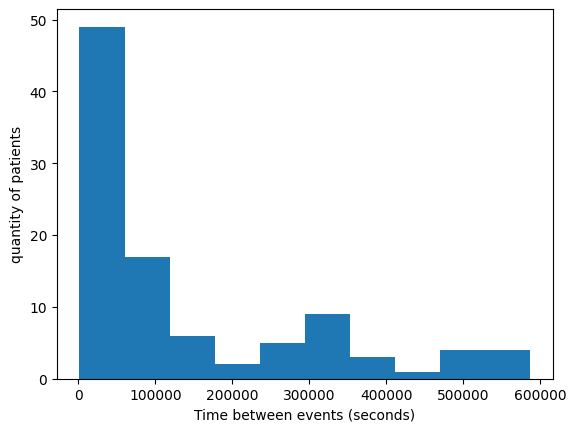

Среднее время между первой консультацией и следующим шагом лечения 133638.24 часов
Максимальное время 9785.3 часов
Минимальное время 22.066666666666666 часов


In [53]:
from pm4py.objects.petri_net.utils.performance_map import mean
import pm4py
import matplotlib.pyplot as plt
time_diff = log_csv.groupby("case:concept:name")["relativetime_s"] \
                  .apply(pd.to_datetime) \
                  .diff() \
                  .dropna() \
                  .apply(lambda x: x.total_seconds())
tracefilter_log_pos = pm4py.filter_event_attribute_values(log_csv, "NumActions in Case", [2], level="event", retain=True)
plt.hist(tracefilter_log_pos['relativetime_s'], bins=10)
plt.xlabel("Time between events (seconds)")
plt.ylabel("quantity of patients")
plt.show()

tracefilter_log_pos = pm4py.filter_event_attribute_values(log_csv, "NumActions in Case", [2], level="event", retain=True)
print(f"Среднее время между первой консультацией и следующим шагом лечения {mean(tracefilter_log_pos['relativetime_s'])} часов")
print(f"Максимальное время {max(tracefilter_log_pos['relativetime_s'])/60} часов")
print(f"Минимальное время {min(tracefilter_log_pos['relativetime_s'])/60} часов")

12. Используя библиотеки PM4PY и networkx, создайте граф социальных связей по данному журналу событий, используя метрику SNA

In [54]:
import pandas as pd
import networkx as nx
import pm4py

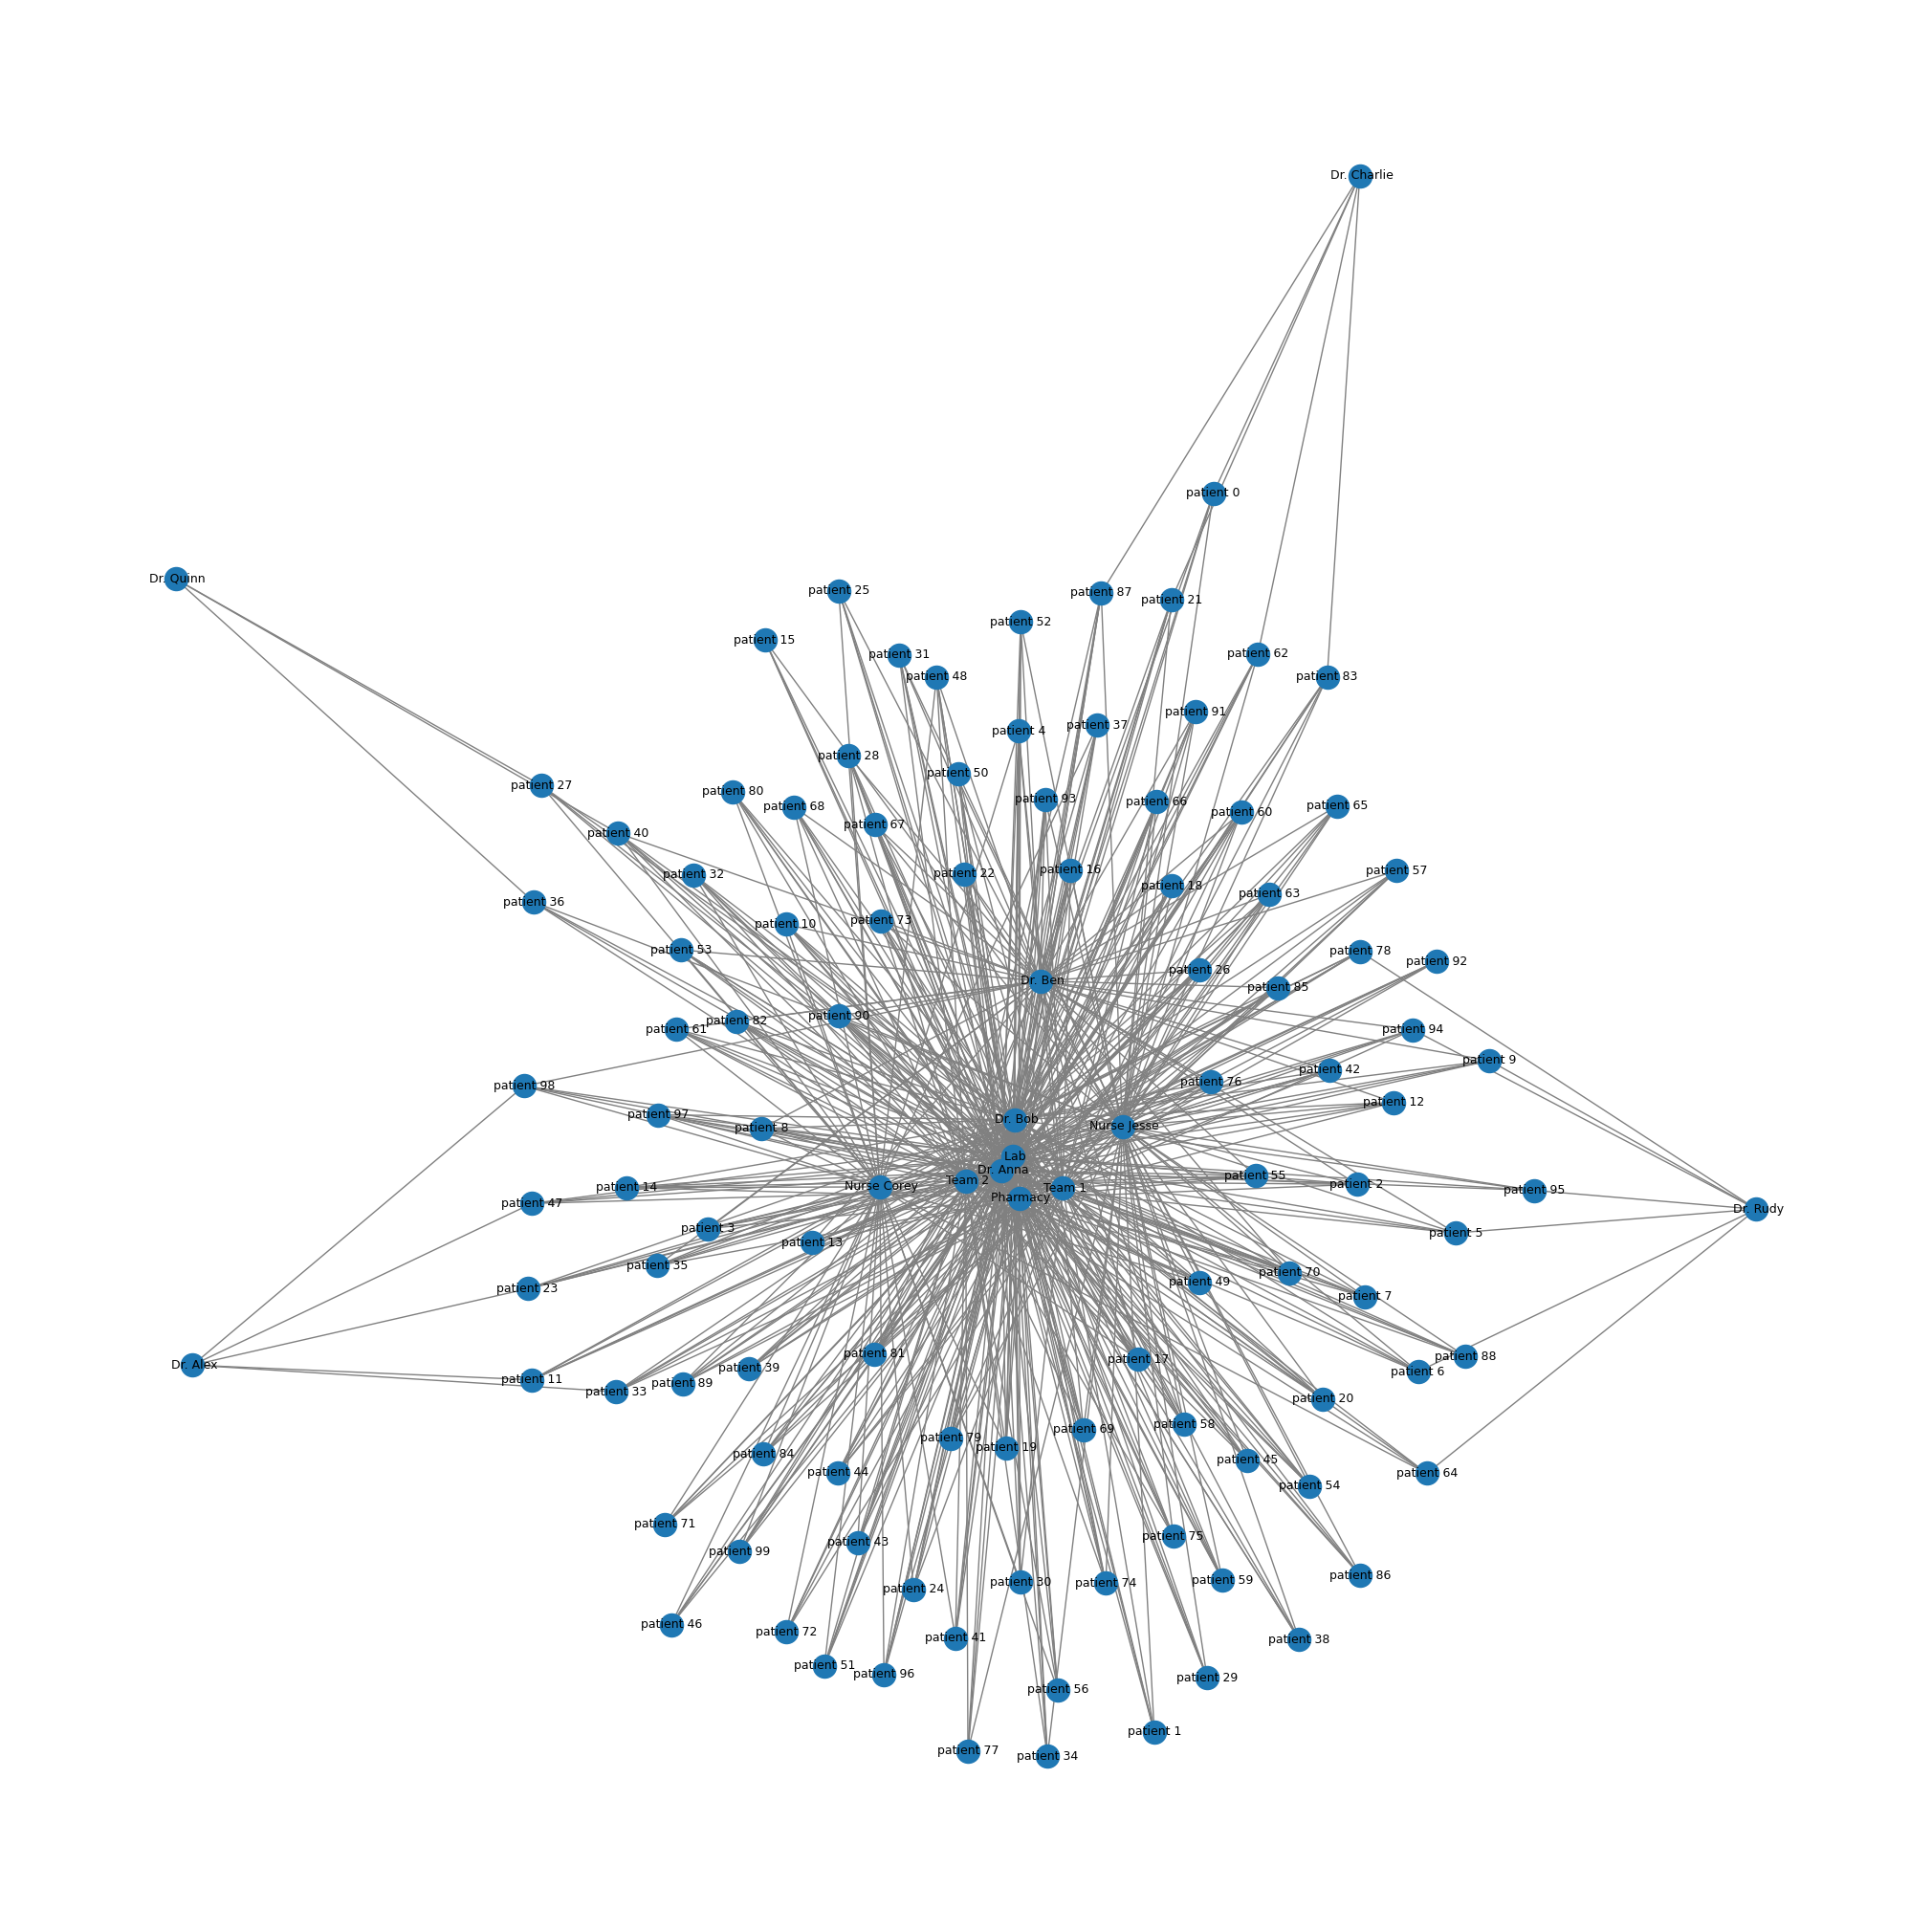

In [55]:
G = nx.from_pandas_edgelist(log_csv, 'case:concept:name', 'org:resource')
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
nx.set_node_attributes(G, degree_centrality, 'degree_centrality')
plt.figure(figsize=(20,20))
nx.draw(G, with_labels=True, edge_color='grey', font_size=9)

**Задание. Обнаружение модели процессов**

По имеющемуся набору данных постройте модель процессов используя различные алгоритмы обнаружения процесса: inductive miner, heuristics miner, Alpha Miner, DFG граф.
Для каждой модели постройте сети Петри, сравните и сделайте вывод о том, какая модель больше всего подходит в данной задаче (привести значения различных метрик).

replaying log with TBR, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/39 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]

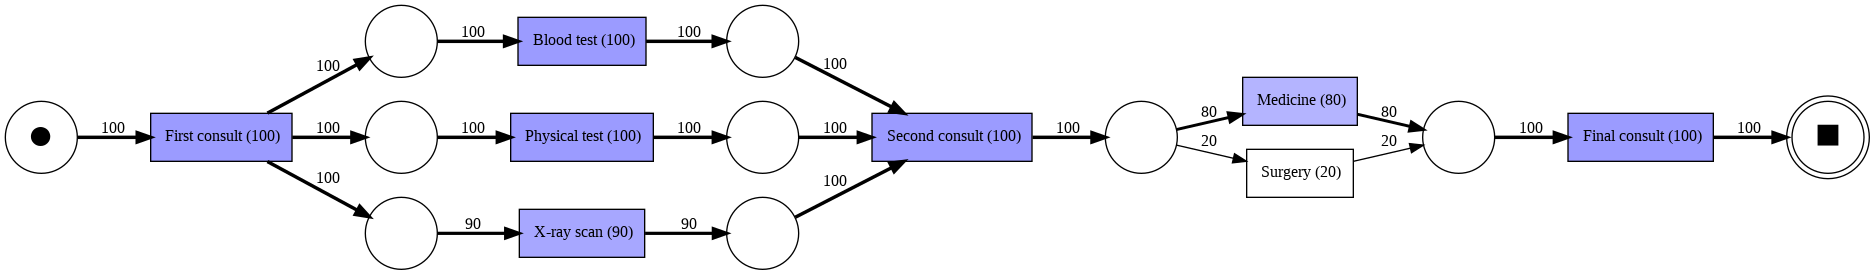

Показания метрик:
Fitness: 0.98989898989899
Precision: 0.9830188679245283
Generalization: 0.8823975685045107
Simplicity: 0.8181818181818181


In [63]:
# Импортируем алгоритм из библиотеки PM4PY
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator

# Создаем алгоритм
net, initial_marking, final_marking = alpha_miner.apply(event_log)
# Импортируем метод визуализации Сетей Петри из библиотеки PM4Py
from pm4py.visualization.petri_net import visualizer as pn_visualizer

gviz = pn_visualizer.apply(net, initial_marking, final_marking)


parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}

fitness = pm4py.fitness_token_based_replay(event_log, net, initial_marking, final_marking)
prec = pm4py.precision_token_based_replay(event_log, net, initial_marking, final_marking)
gen = generalization_evaluator.apply(event_log, net, initial_marking, final_marking)
simp = simplicity_evaluator.apply(net)

gviz = pn_visualizer.apply(net, initial_marking,
                           final_marking,
                           parameters=parameters,
                           variant=pn_visualizer.Variants.FREQUENCY,
                           log=event_log)

pn_visualizer.view(gviz)
print(f"Показания метрик:\nFitness: {fitness['log_fitness']}\nPrecision: {prec}\nGeneralization: {gen}\nSimplicity: {simp}")


replaying log with TBR, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/39 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]

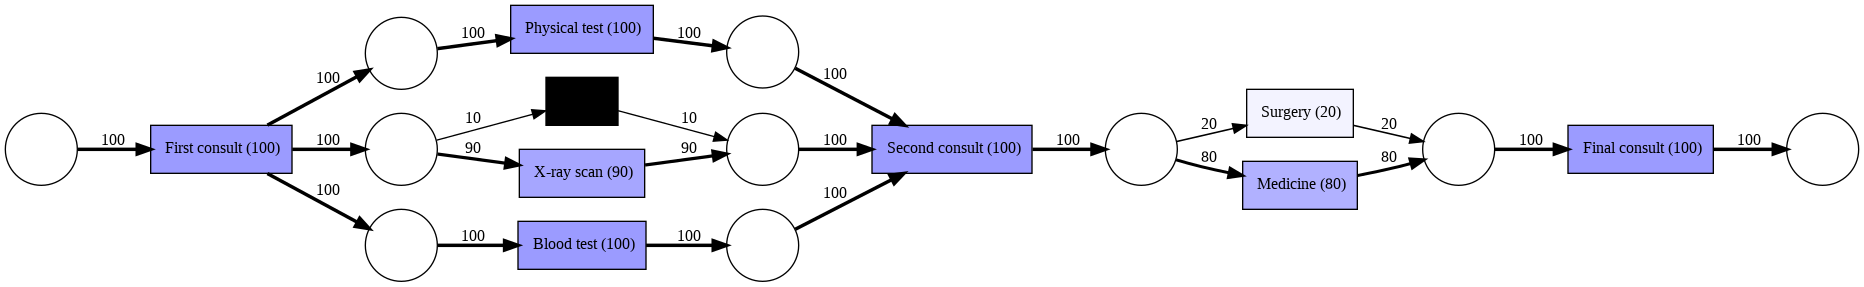

Показания метрик:
Fitness: 0.8
Precision: 1.0
Generalization: 0.8603280868910275
Simplicity: 0.7599999999999999


In [67]:
from pm4py.algo.discovery.alpha import algorithm as inductive_miner
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator

# Создаем алгоритм
net, im, fm = pm4py.discover_petri_net_inductive(event_log)
# Импортируем метод визуализации Сетей Петри из библиотеки PM4Py
from pm4py.visualization.petri_net import visualizer as pn_visualizer

gviz = pn_visualizer.apply(net, initial_marking, final_marking)


parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}

fitness = pm4py.fitness_token_based_replay(event_log, net, initial_marking, final_marking)
prec = pm4py.precision_token_based_replay(event_log, net, initial_marking, final_marking)
gen = generalization_evaluator.apply(event_log, net, initial_marking, final_marking)
simp = simplicity_evaluator.apply(net)

gviz = pn_visualizer.apply(net, initial_marking,
                           final_marking,
                           parameters=parameters,
                           variant=pn_visualizer.Variants.FREQUENCY,
                           log=event_log)

pn_visualizer.view(gviz)
print(f"Показания метрик:\nFitness: {fitness['log_fitness']}\nPrecision: {prec}\nGeneralization: {gen}\nSimplicity: {simp}")

replaying log with TBR, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/39 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]

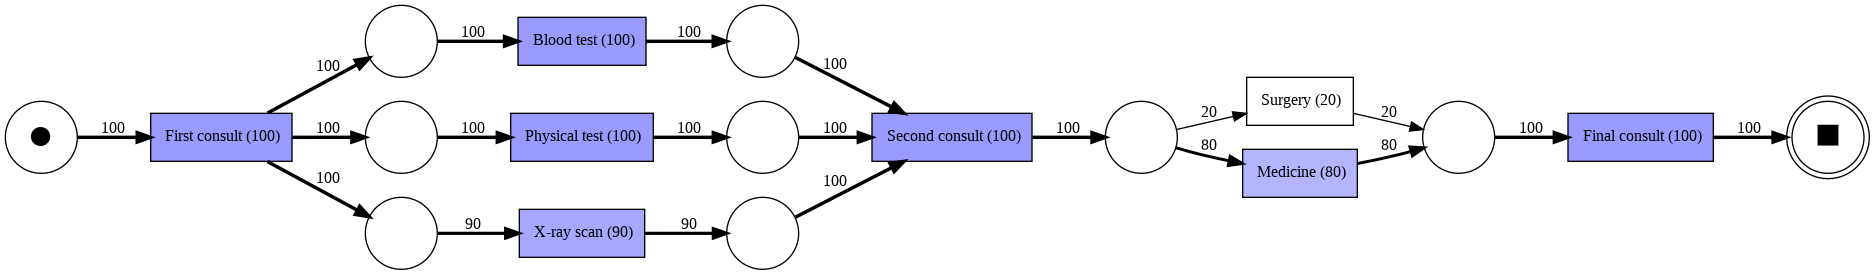

Показания метрик:
Fitness: 0.98989898989899
Precision: 0.9830188679245283
Generalization: 0.8823975685045107
Simplicity: 0.8181818181818181


In [69]:
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator

# Создаем алгоритм
net, initial_marking, final_marking = heuristics_miner.apply(event_log)
# Импортируем метод визуализации Сетей Петри из библиотеки PM4Py
from pm4py.visualization.petri_net import visualizer as pn_visualizer

gviz = pn_visualizer.apply(net, initial_marking, final_marking)


parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}

fitness = pm4py.fitness_token_based_replay(event_log, net, initial_marking, final_marking)
prec = pm4py.precision_token_based_replay(event_log, net, initial_marking, final_marking)
gen = generalization_evaluator.apply(event_log, net, initial_marking, final_marking)
simp = simplicity_evaluator.apply(net)

gviz = pn_visualizer.apply(net, initial_marking,
                           final_marking,
                           parameters=parameters,
                           variant=pn_visualizer.Variants.FREQUENCY,
                           log=event_log)

pn_visualizer.view(gviz)
print(f"Показания метрик:\nFitness: {fitness['log_fitness']}\nPrecision: {prec}\nGeneralization: {gen}\nSimplicity: {simp}")

replaying log with TBR, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/39 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]

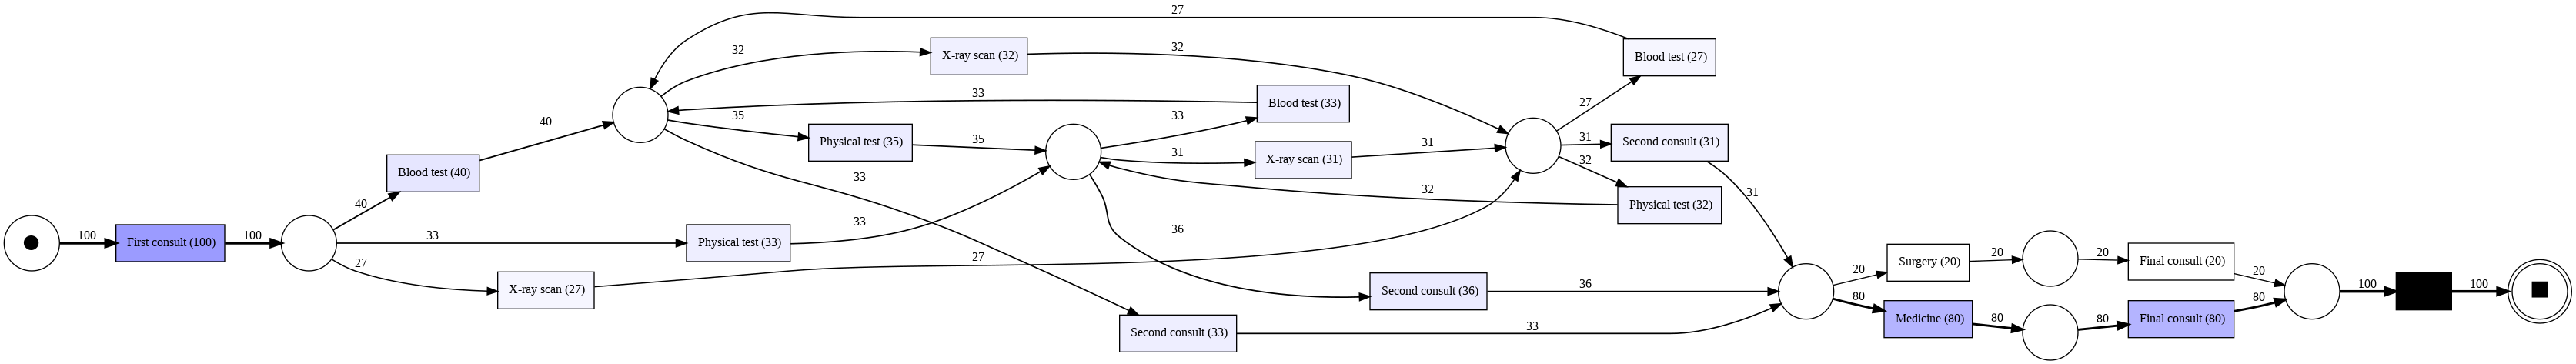

Показания метрик:
Fitness: 1.0
Precision: 0.7089171974522293
Generalization: 0.8341928368975338
Simplicity: 0.6363636363636362


In [76]:
from pm4py.algo.discovery.dfg import algorithm as dfg_graph
from pm4py.objects.conversion.dfg import converter as dfg_mining
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator

# Создаем алгоритм
dfg = dfg_graph.apply(event_log)
net, initial_marking, final_marking = dfg_mining.apply(dfg)
# Импортируем метод визуализации Сетей Петри из библиотеки PM4Py
from pm4py.visualization.petri_net import visualizer as pn_visualizer

gviz = pn_visualizer.apply(net, initial_marking, final_marking)


parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}

fitness = pm4py.fitness_token_based_replay(event_log, net, initial_marking, final_marking)
prec = pm4py.precision_token_based_replay(event_log, net, initial_marking, final_marking)
gen = generalization_evaluator.apply(event_log, net, initial_marking, final_marking)
simp = simplicity_evaluator.apply(net)

gviz = pn_visualizer.apply(net, initial_marking,
                           final_marking,
                           parameters=parameters,
                           variant=pn_visualizer.Variants.FREQUENCY,
                           log=event_log)

pn_visualizer.view(gviz)
print(f"Показания метрик:\nFitness: {fitness['log_fitness']}\nPrecision: {prec}\nGeneralization: {gen}\nSimplicity: {simp}")